# Extracting & Transforming Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Getting the Data:

conf_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recov_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [5]:
conf_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,48,50,50,50,53,59,70,75,82,114
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,420,461,502,511,581,639,639,701,773,839
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,130,138,150,150,160,178,178,200,212,226
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,83,93,99,117,129,149,149,197,238,428


In [6]:
conf_df = conf_df.sort_values(by=[conf_df.columns[-1]], ascending=False)
death_df = death_df.sort_values(by=[death_df.columns[-1]], ascending=False)
recov_df = recov_df.sort_values(by=[recov_df.columns[-1]], ascending=False)

In [7]:
# Transforming go to get dates as rows:

conf_df['location'] = np.where(conf_df['Country/Region']=='China', 'Ch-'+ conf_df['Province/State'],conf_df['Country/Region'])
conf_df = conf_df.groupby('location').sum().drop(['Lat','Long'],axis=1)
conf_df = conf_df.sort_values(by=[conf_df.columns[-1]], ascending=False)
conf_ts = conf_df.T

death_df['location'] = np.where(death_df['Country/Region']=='China', 'Ch-'+ death_df['Province/State'],death_df['Country/Region'])
death_df = death_df.groupby('location').sum().drop(['Lat','Long'],axis=1)
death_df = death_df.sort_values(by=[death_df.columns[-1]], ascending=False)
death_ts = death_df.T

recov_df['location'] = np.where(recov_df['Country/Region']=='China', 'Ch-'+ recov_df['Province/State'],recov_df['Country/Region'])
recov_df = recov_df.groupby('location').sum().drop(['Lat','Long'],axis=1)
recov_df = recov_df.sort_values(by=[recov_df.columns[-1]], ascending=False)
recov_ts = recov_df.T

In [8]:
conf_ts.to_csv('conf_ts.csv')

In [9]:
conf_ts['Total'] = conf_ts.sum(axis=1)
death_ts['Total'] = death_ts.sum(axis=1)
recov_ts['Total'] = recov_ts.sum(axis=1)

In [10]:
conf_ts.head()

location,Ch-Hubei,Italy,Iran,"Korea, South",Spain,Germany,France,US,Switzerland,Ch-Guangdong,...,Ethiopia,Gabon,Guatemala,Guinea,Holy See,Mauritania,Mongolia,Nepal,occupied Palestinian territory,Total
1/22/20,444,0,0,1,0,0,0,1,0,26,...,0,0,0,0,0,0,0,0,0,555
1/23/20,444,0,0,1,0,0,0,1,0,32,...,0,0,0,0,0,0,0,0,0,653
1/24/20,549,0,0,2,0,0,2,2,0,53,...,0,0,0,0,0,0,0,0,0,941
1/25/20,761,0,0,2,0,0,3,2,0,78,...,0,0,0,0,0,0,0,1,0,1434
1/26/20,1058,0,0,3,0,0,3,5,0,111,...,0,0,0,0,0,0,0,1,0,2118


In [11]:
print('# of locations: ', len(list(conf_ts.columns)))
lst_locs = list(conf_ts.columns)
print(lst_locs)

# of locations:  180
['Ch-Hubei', 'Italy', 'Iran', 'Korea, South', 'Spain', 'Germany', 'France', 'US', 'Switzerland', 'Ch-Guangdong', 'Ch-Henan', 'Ch-Zhejiang', 'Norway', 'United Kingdom', 'Netherlands', 'Sweden', 'Ch-Hunan', 'Ch-Anhui', 'Ch-Jiangxi', 'Belgium', 'Denmark', 'Austria', 'Japan', 'Ch-Shandong', 'Cruise Ship', 'Ch-Jiangsu', 'Ch-Chongqing', 'Ch-Sichuan', 'Ch-Heilongjiang', 'Ch-Beijing', 'Malaysia', 'Qatar', 'Ch-Shanghai', 'Greece', 'Ch-Hebei', 'Australia', 'Ch-Fujian', 'Czechia', 'Ch-Guangxi', 'Canada', 'Israel', 'Ch-Shaanxi', 'Portugal', 'Finland', 'Singapore', 'Slovenia', 'Bahrain', 'Ch-Yunnan', 'Iceland', 'Estonia', 'Ch-Hainan', 'Brazil', 'Ch-Guizhou', 'Ch-Hong Kong', 'Philippines', 'Ch-Tianjin', 'Ch-Gansu', 'Ch-Shanxi', 'Romania', 'Ireland', 'Ch-Liaoning', 'Poland', 'Indonesia', 'Iraq', 'Thailand', 'India', 'Kuwait', 'Egypt', 'Lebanon', 'Saudi Arabia', 'San Marino', 'United Arab Emirates', 'Ch-Jilin', 'Ch-Xinjiang', 'Ch-Ningxia', 'Ch-Inner Mongolia', 'Chile', 'Russia', '

In [12]:
#conf_ts = conf_ts.drop(['Cruise Ship','Total'], axis=1)

## Converting 0's to nan, for plotting pourposes.

In [13]:
# converting 0's to nan, for plotting pourposes.

lst_locs = list(conf_ts.columns)

conf_ts2 = conf_ts.copy()
death_ts2 = death_ts.copy()
recov_ts2 = recov_ts.copy()

for loc_n in lst_locs:
    conf_ts2[loc_n] = np.where(conf_ts2[loc_n]==0, np.nan, conf_ts2[loc_n])


## Generating First Appearence Data

In [14]:
f_app = conf_ts2.copy()
day_app = pd.DataFrame(f_app.isnull().sum()+1, columns=['Day_inf_detected'])
day_app.to_csv('../data/day_inf_dectectec.csv')

## Plotting Data

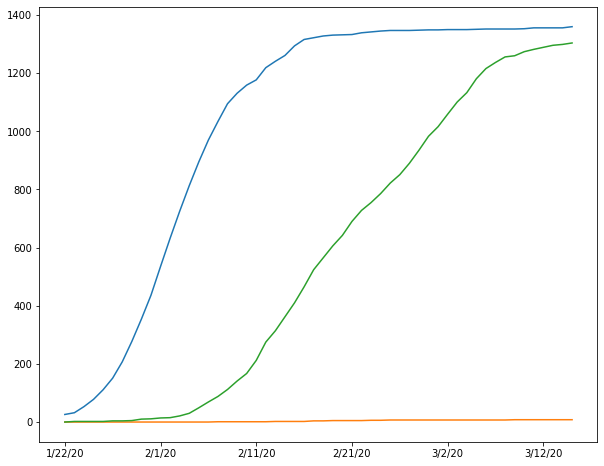

In [15]:
# Plotting each case locations:

fit = plt.figure(figsize=(10,8))
conf_ts2['Ch-Guangdong'].plot()
death_ts2['Ch-Guangdong'].plot()
recov_ts2['Ch-Guangdong'].plot()


In [16]:
# Top 16 locations
top_locs = lst_locs[:40]
print(top_locs)

['Ch-Hubei', 'Italy', 'Iran', 'Korea, South', 'Spain', 'Germany', 'France', 'US', 'Switzerland', 'Ch-Guangdong', 'Ch-Henan', 'Ch-Zhejiang', 'Norway', 'United Kingdom', 'Netherlands', 'Sweden', 'Ch-Hunan', 'Ch-Anhui', 'Ch-Jiangxi', 'Belgium', 'Denmark', 'Austria', 'Japan', 'Ch-Shandong', 'Cruise Ship', 'Ch-Jiangsu', 'Ch-Chongqing', 'Ch-Sichuan', 'Ch-Heilongjiang', 'Ch-Beijing', 'Malaysia', 'Qatar', 'Ch-Shanghai', 'Greece', 'Ch-Hebei', 'Australia', 'Ch-Fujian', 'Czechia', 'Ch-Guangxi', 'Canada']


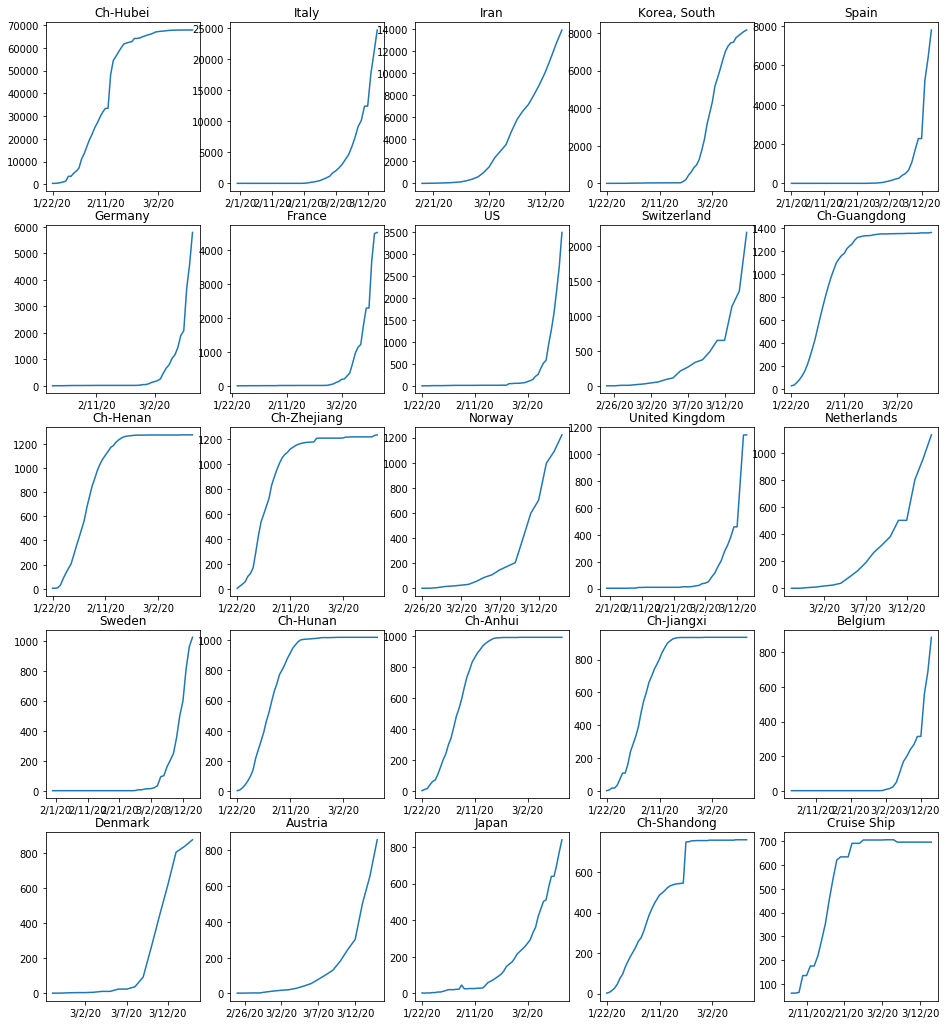

In [17]:
fig = plt.figure(figsize=(16,18))

# Divide the figure into a 4x4 grid:

ax1 = fig.add_subplot(5,5,1)
ax2 = fig.add_subplot(5,5,2)
ax3 = fig.add_subplot(5,5,3)
ax4 = fig.add_subplot(5,5,4)
ax5 = fig.add_subplot(5,5,5)
ax6 = fig.add_subplot(5,5,6)
ax7 = fig.add_subplot(5,5,7)
ax8 = fig.add_subplot(5,5,8)
ax9 = fig.add_subplot(5,5,9)
ax10= fig.add_subplot(5,5,10)
ax11= fig.add_subplot(5,5,11)
ax12= fig.add_subplot(5,5,12)
ax13= fig.add_subplot(5,5,13)
ax14= fig.add_subplot(5,5,14)
ax15= fig.add_subplot(5,5,15)
ax16= fig.add_subplot(5,5,16)
ax17= fig.add_subplot(5,5,17)
ax18= fig.add_subplot(5,5,18)
ax19= fig.add_subplot(5,5,19)
ax20= fig.add_subplot(5,5,20)
ax21= fig.add_subplot(5,5,21)
ax22= fig.add_subplot(5,5,22)
ax23= fig.add_subplot(5,5,23)
ax24= fig.add_subplot(5,5,24)
ax25= fig.add_subplot(5,5,25)

ax_lst = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,
          ax16,ax17,ax18,ax19,ax20,ax21,ax22,ax23,ax24,ax25]

for count, axn in enumerate(ax_lst): 
    conf_ts2[top_locs[count]].plot(ax=axn)
    axn.set_title(top_locs[count])

# SciPy to Determine Curves

In [18]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Len = 41
x = np.arange(len(conf_ts['Italy']))


#y = conf_ts['Ch-Anhui'].values
#y = conf_ts['Iran'].values
#y = conf_ts['Ch-Henan'].values
#y = conf_ts['Ch-Hubei'].values
#y = conf_ts['South Korea'].values
#y = conf_ts['Italy'].values
#y = conf_ts['Ch-Guangdong'].values
#y = conf_ts['Mexico'].values
#y = conf_ts['Japan'].values
#y = conf_ts['France'].values
#y = conf_ts['Others'].values
#y = conf_ts['US'].values
#y = conf_ts['Hong Kong'].values
#y = conf_ts['Total'].values
#y = conf_ts['Germany'].values
#y = conf_ts['Spain'].values
#y = conf_ts['Ch-Ningxia'].values
#y = conf_ts['Bahrain'].values
#y = conf_ts['Kuwait'].values
#y = conf_ts['Ch-Inner Mongolia'].values
y = conf_ts['Ch-Jilin'].values
#y = conf_ts['Switzerland'].values



# Logistic Regretion Formula:
# L / (1 + e ^-k( x - a ))
# L -> Max Growth ,  a -> x value at midpoint ,  k -> Growth Rate

def func(x, L, k, a):
    return L/(1 + np.exp(-k*(x-a)))

# Limitar: 0 < L < 100,000 ;  0 < k < 1 ;  0 < a < 50

In [19]:
popt, pcov = curve_fit(func, x, y, bounds=(0, [80000, 1, 100]))
popt

array([92.22057769,  0.34056546, 13.62665688])

R2:  0.9976277310635115


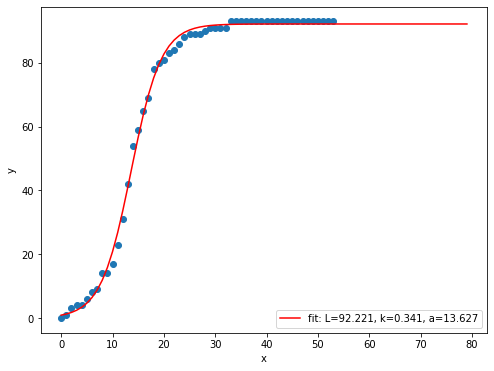

In [20]:
fig = plt.figure(figsize=(8,6))
plt.scatter(x,y)
x2 = np.arange(80)
plt.plot(x2, func(x2, *popt), 'r-', label='fit: L=%5.3f, k=%5.3f, a=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
r2 = r2_score(y, func(x, *popt))
print('R2: ',r2)

# Building DataFrame with Crucial Data


In [18]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

res_df = pd.DataFrame()

res_df['Total_conf'] =  conf_df.iloc[:,-1]
res_df['Total_death'] =  death_df.iloc[:,-1]
res_df['Total_recov'] =  recov_df.iloc[:,-1]


row_df = pd.DataFrame(res_df.sum(axis = 0), columns=['Worldwide']).T
res_df = pd.concat([res_df, row_df])

#res_df.iloc[0:40]


In [19]:
loc_list = list(res_df.index[:50])
loc_list.append('Mexico')

log_g_curves = []

def func(x, L, k, a):
    return L/(1 + np.exp(-k*(x-a)))

for loc_i in loc_list:
    x = np.arange(len(conf_ts[loc_i]))
    y = conf_ts[loc_i].values

    popt, pcov = curve_fit(func, x, y, bounds=(0, [90000, 1, 100]))
    
    L = popt[0]
    k = popt[1]
    a = popt[2]
    r2 = r2_score(y, func(x, *popt))
    if loc_i == 'Total':
        loc_i = 'Worldwide'
    
    dict = {'location':loc_i,'L':L,'k':k,'a':a,'R2':r2}
    log_g_curves.append(dict)

In [20]:
final_1 = pd.DataFrame(log_g_curves).set_index('location')
final_1.tail()

,L,k,a,R2
location,,,,
Ch-Yunnan,172.312359,0.270858,10.117381,0.988403
Portugal,90000.000000,0.357211,69.685083,0.985433
Ch-Hainan,169.365479,0.232514,12.565156,0.996186
Iceland,503.227966,0.235976,55.461331,0.988616
Mexico,89999.999973,0.179583,98.963557,0.891339


In [21]:
res = final_1
pop_china = pd.read_csv('../Chinese_City_Population.csv')
pop_china_r = pd.read_csv('../Data/china_province_population.csv')

In [22]:
# Converting the China population to the needed format:
pop_china2 = pop_china.groupby('admin').mean().drop(['population','population_proper'], axis=1)



#pop_china2['Population'] = pop_china.groupby('admin').sum()['population_proper']

new_index = ['Ch-'+str(index) for index in list(pop_china2.index)]
pop_china2['location'] = new_index
pop_china2 = pop_china2.set_index('location')

In [23]:
pop_china_r = pop_china_r.set_index('location').rename(columns={'population_r':'Population'})
pop_china2 = pop_china2.join(pop_china_r)

In [24]:
params1 = res.join(pop_china2)
params1.head()

,L,k,a,R2,lat,lng,Population
location,,,,,,,
Ch-Hubei,67687.546968,0.235108,18.684286,0.993648,30.861038,112.745717,59020000.0
Italy,90000.000000,0.212550,57.724509,0.994194,NaN,NaN,NaN
Iran,15045.405256,0.291939,47.151187,0.995767,NaN,NaN,NaN
"Korea, South",8059.642758,0.347919,39.519960,0.999578,NaN,NaN,NaN
Spain,89999.999935,0.382535,58.662683,0.982342,NaN,NaN,NaN


In [67]:
missing_lst = list(params1[params1.Population.isnull()==True].index)


In [87]:
#missing_lst = ['South Korea', 'Italy', 'Iran', 'Others', 'Japan', 'Spain', 'Singapore','US', 'Hong Kong','Mexico']

world_pop = pd.read_csv('../population_world.csv')
world_pop = world_pop.rename(columns={"Country Name": "location", "2018": "Population2"}) #.set_index('location')

world_loc = [{'location': i} for i in missing_lst]

world_loc = pd.DataFrame(world_loc)

world_pop = world_pop[world_pop['location'].isin(missing_lst)]
world_pop = world_pop.drop(['Country Code','Indicator Name','Indicator Code'], axis=1).reset_index(drop=True)


result = world_pop.merge(world_loc, on='location').set_index('location')

In [88]:
params2 = params1.join(result)

In [89]:

params2['Population'] = np.where(params2.Population.isnull()==True, params2.Population2,params2.Population)

params2 = params2.drop(['Population2'],axis=1)
final2 = params2.copy()
final2 = final2.drop(['lat','lng'], axis=1)

In [113]:
results = final2[(final2.L < 89999) | (final2.Population == 126190788.0) ].drop(['Cruise Ship'])

results

,L,k,a,R2,Population
location,,,,,
Ch-Hubei,67687.546968,0.235108,18.684286,0.993648,59020000.0
Iran,15045.405256,0.291939,47.151187,0.995767,81800269.0
"Korea, South",8059.642758,0.347919,39.519960,0.999578,51635256.0
US,10136.167027,0.322364,55.069005,0.998178,327167434.0
Ch-Guangdong,1344.680956,0.280511,11.710870,0.998613,113460000.0
Ch-Henan,1270.820106,0.282901,12.685752,0.998937,94000000.0
Ch-Zhejiang,1199.261309,0.315734,10.493062,0.995985,57370000.0
Norway,1702.037544,0.456828,50.566309,0.994203,5314336.0
Ch-Hunan,1017.633457,0.285612,11.904236,0.998415,67370000.0


# Adding Variables

In [114]:
# Importing Variables
data_pob = pd.read_csv('../data/compiled_metrics.csv')
data_air = pd.read_csv('../data/quality_air_compiled.csv')
day_det = pd.read_csv('../data/day_inf_dectectec.csv')
data_area = pd.read_csv('../data/km2_world_all.csv')


In [115]:
data_area2= data_area.set_index('location')
data_air2 = data_air[['location_adj','Air_Pm2.5']].set_index('location_adj')
data_pob2 = data_pob.drop('Region',axis=1).set_index('location_adj')
day_det2 = day_det.set_index('location')

In [118]:
res4 = results.join(data_area2).join(data_air2).join(data_pob2).join(day_det2)
res4

,L,k,a,R2,Population,km2,Air_Pm2.5,Male_population,Over_65,Foreign_turism,health_exp_usd,Day_inf_detected
location,,,,,,,,,,,,
Ch-Hubei,67687.546968,0.235108,18.684286,0.993648,59020000.0,185900.0,59.254700,24973000.0,6059000.0,3070000.0,590.141205,1
Iran,15045.405256,0.291939,47.151187,0.995767,81800269.0,1648000.0,48.950000,41358928.0,5058998.0,7295000.0,1563.751678,29
"Korea, South",8059.642758,0.347919,39.519960,0.999578,51635256.0,100210.0,25.138890,25860546.0,7445058.0,15347000.0,2711.738257,1
US,10136.167027,0.322364,55.069005,0.998178,327167434.0,9834000.0,7.363650,161882398.0,51717496.0,79745920.0,9869.742382,1
Ch-Guangdong,1344.680956,0.280511,11.710870,0.998613,113460000.0,177900.0,34.465890,50209000.0,7687000.0,8620000.0,564.806353,1
Ch-Henan,1270.820106,0.282901,12.685752,0.998937,94000000.0,167000.0,75.389510,39815000.0,8698000.0,1050000.0,604.848058,1
Ch-Zhejiang,1199.261309,0.315734,10.493062,0.995985,57370000.0,101800.0,44.766770,24418000.0,6108000.0,3230000.0,641.529018,1
Norway,1702.037544,0.456828,50.566309,0.994203,5314336.0,385203.0,7.045800,2682431.0,906053.0,5688000.0,6203.454703,36
Ch-Hunan,1017.633457,0.285612,11.904236,0.998415,67370000.0,210000.0,48.635940,28469000.0,7057000.0,1790000.0,584.367616,1


# Splitting the Data

In [121]:
# Splitting Data
mex_row = res4.loc['Mexico']

y_L = res4['L'].drop('Mexico')
y_k = res4['k'].drop('Mexico')
y_a = res4['a'].drop('Mexico')

x_L = res4[['Population','Air_Pm2.5','Male_population','Over_65','health_exp_usd']]
x_k = res4[['L', 'km2','Air_Pm2.5','Population','Foreign_turism','health_exp_usd','Day_inf_detected']]
x_a = res4[['km2','Population','Day_inf_detected']]

In [120]:
mex_row

L                   9.000000e+04
k                   1.795833e-01
a                   9.896356e+01
R2                  8.913389e-01
Population          1.261908e+08
km2                 1.973000e+06
Air_Pm2.5           2.123615e+01
Male_population     6.172082e+07
Over_65             9.115625e+06
Foreign_turism      4.131300e+07
health_exp_usd      9.718232e+02
Day_inf_detected    3.800000e+01
Name: Mexico, dtype: float64

In [125]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_L_norm = scaler.fit_transform(x_L)
x_k_norm = scaler.fit_transform(x_k)
x_a_norm = scaler.fit_transform(x_a)

mex_L_test = x_L_norm[-1]
mex_k_test = x_k_norm[-1]
mex_a_test = x_a_norm[-1]

x_L_data = x_L_norm[:-1]
x_k_data = x_k_norm[:-1]
x_a_data = x_a_norm[:-1]

## Generating Testing Data

In [168]:
# Testing Data
hubei_L_test = x_L_norm[0]
hubei_k_test = x_k_norm[0]
hubei_a_test = x_a_norm[0]

iran_L_test = x_L_norm[1]
iran_k_test = x_k_norm[1]
iran_a_test = x_a_norm[1]

sk_L_test = x_L_norm[2]
sk_k_test = x_k_norm[2]
sk_a_test = x_a_norm[2]

us_L_test = x_L_norm[3]
us_k_test = x_k_norm[3]
us_a_test = x_a_norm[3]

guangdong_L_test = x_L_norm[4]
guangdong_k_test = x_k_norm[4]
guangdong_a_test = x_a_norm[4]


In [129]:
print(y_L.shape)
print(y_k.shape)
print(y_a.shape)

print(x_L_data.shape)
print(mex_L_test.shape)

# Shapes OK!

(35,)
(35,)
(35,)
(35, 5)
(5,)


In [130]:
from sklearn.model_selection import train_test_split

# Splitting for L
X_train_L, X_test_L, y_train_L, y_test_L = train_test_split(x_L_data, y_L, test_size=0.08)

# Splitting for k
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(x_k_data, y_k, test_size=0.08)

# Splitting for a
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(x_a_data, y_a, test_size=0.08)


In [131]:
# Models to Try:
# - RandomForest
# - LinearRegression
# - Lasso
# - ElasticNet
# - RidgeRegression
# - SVR
# - EnsembleRegressors

from sklearn.metrics import r2_score    #r2_score(y_true, y_pred)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

## Modelling for L

In [132]:
# Linear Regression
mod_L_linear = LinearRegression()
mod_L_linear.fit(X_train_L, y_train_L)
print(mod_L_linear.score(X_train_L, y_train_L))
y_pred_L = mod_L_linear.predict(X_test_L)
print(r2_score(y_test_L.values, y_pred_L))

0.047652730925124565
-282.1763606845892


In [145]:
# Random Forest
mod_L_ranfor = RandomForestRegressor()
mod_L_ranfor.fit(X_train_L, y_train_L)
print(mod_L_ranfor.score(X_train_L, y_train_L))
y_pred_L = mod_L_ranfor.predict(X_test_L)
print(r2_score(y_test_L.values, y_pred_L))

0.7823537427523618
-6.984514212779211


In [134]:
# Lasso
mod_L_lasso = Lasso()
mod_L_lasso.fit(X_train_L, y_train_L)
print(mod_L_lasso.score(X_train_L, y_train_L))
y_pred_L = mod_L_lasso.predict(X_test_L)
print(r2_score(y_test_L.values, y_pred_L))

0.047157298287597293
-258.9056108343617


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283404914.9452963, tolerance: 452043.40299016365
  positive)


In [135]:
# ElasticNet
mod_L_elNet = ElasticNet()
mod_L_elNet.fit(X_train_L, y_train_L)
print(mod_L_elNet.score(X_train_L, y_train_L))
y_pred_L = mod_L_elNet.predict(X_test_L)
print(r2_score(y_test_L.values, y_pred_L))

0.008542844696668328
-201.76531514125446


In [136]:
#RidgeRegression
mod_L_ridge = Ridge()
mod_L_ridge.fit(X_train_L, y_train_L)
print(mod_L_ridge.score(X_train_L, y_train_L))
y_pred_L = mod_L_ridge.predict(X_test_L)
print(r2_score(y_test_L.values, y_pred_L))

0.02909928894894398
-201.20601022092336


In [137]:
#SVR
mod_L_SVR = SVR()
mod_L_SVR.fit(X_train_L, y_train_L)
print(mod_L_SVR.score(X_train_L, y_train_L))
y_pred_L = mod_L_SVR.predict(X_test_L)
print(r2_score(y_test_L.values, y_pred_L))

-0.06960256620703431
-0.46912649439866616


In [146]:
print(y_pred_L)
print(y_test_L.values)

[1098.59475637  449.11893257 1238.26109243]
[416.73094512 936.70657026 495.14072265]


## Modelling for k

In [147]:
# Linear Regression
mod_k_linear = LinearRegression()
mod_k_linear.fit(X_train_k, y_train_k)
print(mod_k_linear.score(X_train_k, y_train_k))
y_pred_k = mod_k_linear.predict(X_test_k)
print(r2_score(y_test_k.values, y_pred_k))

0.3933480744303931
0.1397811354509526


In [148]:
# Random Forest
mod_k_ranfor = RandomForestRegressor()
mod_k_ranfor.fit(X_train_k, y_train_k)
print(mod_k_ranfor.score(X_train_k, y_train_k))
y_pred_k = mod_k_ranfor.predict(X_test_k)
print(r2_score(y_test_k.values, y_pred_k))

0.8160928735126006
-1.3755230307262094


In [149]:
# Lasso
mod_k_lasso = Lasso()
mod_k_lasso.fit(X_train_k, y_train_k)
print(mod_k_lasso.score(X_train_k, y_train_k))
y_pred_k = mod_k_lasso.predict(X_test_k)
print(r2_score(y_test_k.values, y_pred_k))

0.0
-1.1234565560228318


In [150]:
#SVR
mod_k_SVR = SVR()
mod_k_SVR.fit(X_train_k, y_train_k)
print(mod_k_SVR.score(X_train_k, y_train_k))
y_pred_k = mod_k_SVR.predict(X_test_k)
print(r2_score(y_test_k.values, y_pred_k))

0.5252147802143607
-1.8673345981086276


In [151]:
print(y_pred_k)
print(y_test_k.values)

[0.24136237 0.34932721 0.24062376]
[0.28561152 0.11041832 0.29503381]


## Modelling for a

In [153]:
# Linear Regression
mod_a_linear = LinearRegression()
mod_a_linear.fit(X_train_a, y_train_a)
print(mod_a_linear.score(X_train_a, y_train_a))
y_pred_a = mod_a_linear.predict(X_test_a)
print(r2_score(y_test_a.values, y_pred_a))

0.6344468572131748
-17.307378400275507


In [157]:
# Random Forest
mod_a_ranfor = RandomForestRegressor()
mod_a_ranfor.fit(X_train_a, y_train_a)
print(mod_a_ranfor.score(X_train_a, y_train_a))
y_pred_a = mod_a_ranfor.predict(X_test_a)
print(r2_score(y_test_a.values, y_pred_a))

0.9303308858735413
-37.069701209439096


In [155]:
# Lasso
mod_a_lasso = Lasso()
mod_a_lasso.fit(X_train_a, y_train_a)
print(mod_a_lasso.score(X_train_a, y_train_a))
y_pred_a = mod_a_lasso.predict(X_test_a)
print(r2_score(y_test_a.values, y_pred_a))

0.5238466471708187
-32.05834955055349


In [156]:
#SVR
mod_a_SVR = SVR()
mod_a_SVR.fit(X_train_a, y_train_a)
print(mod_a_SVR.score(X_train_a, y_train_a))
y_pred_a = mod_a_SVR.predict(X_test_a)
print(r2_score(y_test_a.values, y_pred_a))

0.3729241548437643
-8.968130047584433


In [158]:
print(y_pred_a)
print(y_test_a.values)

[28.35235725 17.34227333 21.98160316]
[11.71087023 12.68575157 15.74590533]


# Getting Values for Mexico

In [159]:
mex_pred_L = mod_L_ranfor.predict([mex_L_test])
mex_pred_k = mod_k_ranfor.predict([mex_k_test])
mex_pred_a = mod_a_ranfor.predict([mex_a_test])


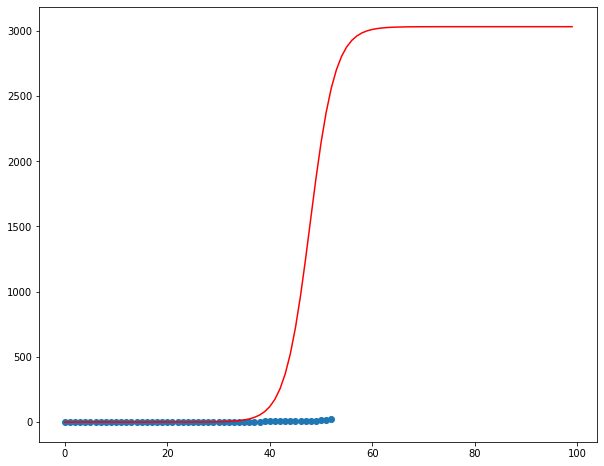

In [165]:
def func(x, L, k, a):
    return L/(1 + np.exp(-k*(x-a)))

conf_ts = pd.read_csv('conf_ts.csv')

x1 = np.arange(len(conf_ts['Korea, South']))
x2 = np.arange(100)
fig = plt.figure(figsize=(10,8))
plt.scatter(x1, conf_ts.Mexico)
plt.plot(x2, func(x2, mex_pred_L, mex_pred_k, mex_pred_a), 'r-')


# Testing for other countries

In [175]:
hubei_pred_L = mod_L_ranfor.predict([hubei_L_test])
hubei_pred_k = mod_k_ranfor.predict([hubei_k_test])
hubei_pred_a = mod_a_linear.predict([hubei_a_test])

iran_pred_L = mod_L_ranfor.predict([iran_L_test])
iran_pred_k = mod_k_ranfor.predict([iran_k_test])
iran_pred_a = mod_a_linear.predict([iran_a_test])

sk_pred_L = mod_L_ranfor.predict([sk_L_test])
sk_pred_k = mod_k_ranfor.predict([sk_k_test])
sk_pred_a = mod_a_linear.predict([sk_a_test])

us_pred_L = mod_L_ranfor.predict([us_L_test])
us_pred_k = mod_k_ranfor.predict([us_k_test])
us_pred_a = mod_a_linear.predict([us_a_test])

guangdong_pred_L = mod_L_ranfor.predict([guangdong_L_test])
guangdong_pred_k = mod_k_ranfor.predict([guangdong_k_test])
guangdong_pred_a = mod_a_linear.predict([guangdong_a_test])

## Testing Hubei

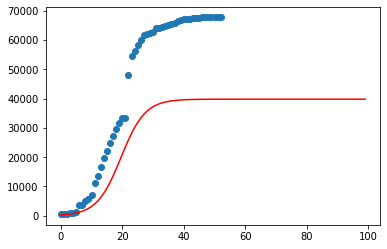

In [177]:
x1 = np.arange(len(conf_ts['Mexico']))
x2 = np.arange(100)
plt.scatter(x1, conf_ts['Ch-Hubei'])
plt.plot(x2, func(x2, hubei_pred_L, hubei_pred_k, hubei_pred_a), 'r-')

## Testing Iran

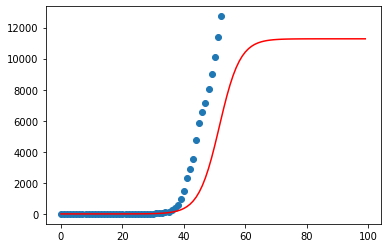

In [178]:
x1 = np.arange(len(conf_ts['Mexico']))
x2 = np.arange(100)
plt.scatter(x1, conf_ts['Iran'])
plt.plot(x2, func(x2, iran_pred_L, iran_pred_k, iran_pred_a), 'r-')

## Testing South Korea

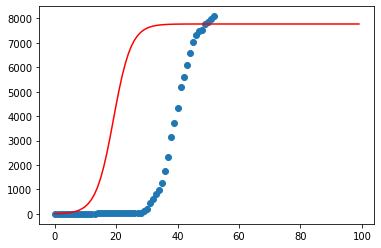

In [182]:
x1 = np.arange(len(conf_ts['Mexico']))
x2 = np.arange(100)
plt.scatter(x1, conf_ts['Korea, South'])
plt.plot(x2, func(x2, sk_pred_L, sk_pred_k, sk_pred_a), 'r-')

## Testing US

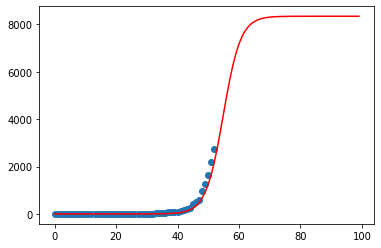

In [183]:
x1 = np.arange(len(conf_ts['Mexico']))
x2 = np.arange(100)
plt.scatter(x1, conf_ts['US'])
plt.plot(x2, func(x2, us_pred_L, us_pred_k, us_pred_a), 'r-')

## Testing Guangdong

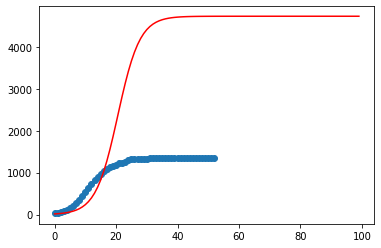

In [184]:
x1 = np.arange(len(conf_ts['Mexico']))
x2 = np.arange(100)
plt.scatter(x1, conf_ts['Ch-Guangdong'])
plt.plot(x2, func(x2, guangdong_pred_L, guangdong_pred_k, guangdong_pred_a), 'r-')